<a href="https://colab.research.google.com/github/MartinPSE/PyTorch_Basic/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 이진 분류 ( Binary Classification) 
---
  둘 중 하나를 결정하는 문제, 이러한 이진 분류를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀!

로지스틱 회귀에서의 가설은 
$$H(x) = f(Wx+b)$$
대부분 S자 모양의 그래프를 그릴 수 있는 어떤 함수 f가 이미 널리 알려져있다. <br>
바로 **Sigmoid 함수**

## 2. 시그모이드 함수 ( Sigmoid function)
---
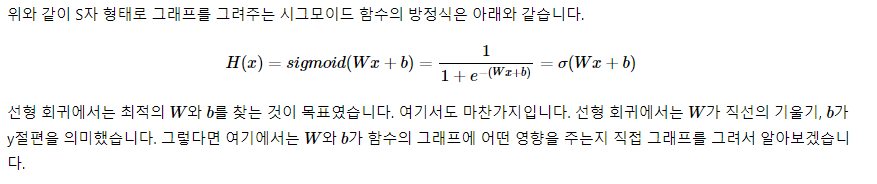

### 시그모이드를 함 그려보자


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x)) 

#### 1-1. W가 1이고, b가 0인 그래프


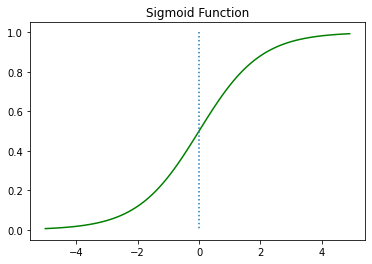

In [4]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0], [1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

SIgmoid 함수는 0 에서 1 사이의 값으로 조정하여 반환한다. <br>
x가 0일 때 0.5의 값을, x가 매우 커지면 1에, 매우 작아지면 0에 수렴한다.

#### 1-2. W값의 변화에 따른 경사도 변화

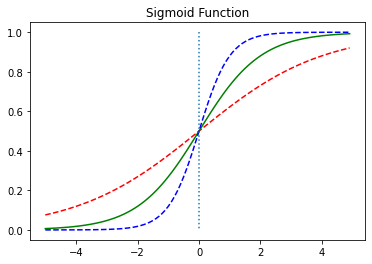

In [5]:
x = np.arange(-5.0,5.0,0.1)
y1= sigmoid(0.5 * x )
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')

plt.plot([0,0], [1.0,0.0] , ':')
plt.title('Sigmoid Function')
plt.show()

W 값이 커지면 경사가 커지고, W값이 작아지면 경사가 작아진다.

#### 1-3. b값의 변화에 따른 좌,우 이동
---

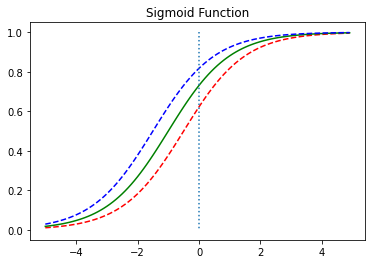

In [6]:

y1= sigmoid(x+0.5)
y2= sigmoid(x+1)
y3= sigmoid(x+1.5)


plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')

plt.plot([0,0], [1.0,0.0] , ':')
plt.title('Sigmoid Function')
plt.show()


#### 1-4. Sigmoid 함수를 이용한 분류
---
  입력값이 한없이 커지면 1에 수렴, 한없이 작아지면 0에 수렴. **즉 시그모이드 함수의 출력 값은 0 ~ 1사이의 값을 갖는다.** Threshold(임계값)을 0.5라고 지정하면 0.5이상이면 1 == True, 이하면 0 == False로 판단하게 만들 수 있다. 이를 확률이라고 생각하면 해당 레이블에 속할 확률이 50%가 넘으면 해당 레이블, 50% 이하면 아니라고 판단한다는 얘기다!

### 비용 함수 ( Cost Function )
---
로지스틱 회귀의 가설은 $$ H(x) = sigmoid(Wx+b)$$ 
여기서 W와 b를 찾을 수 있는 cost function을 정의해야 한다.여기서 평균 제곱 오차를 사용하게 되면, <br>
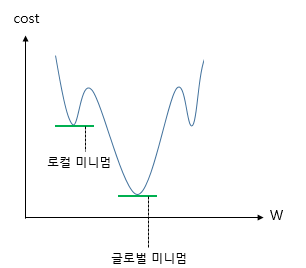

로컬 미니멈에 빠지는 오류를 범할 수 있다. 그러므로 cost가 최소가 되는 가중치 W를 찾는다는 '비용 함수(cost fucntion)'의 목적에 맞지 않는다.

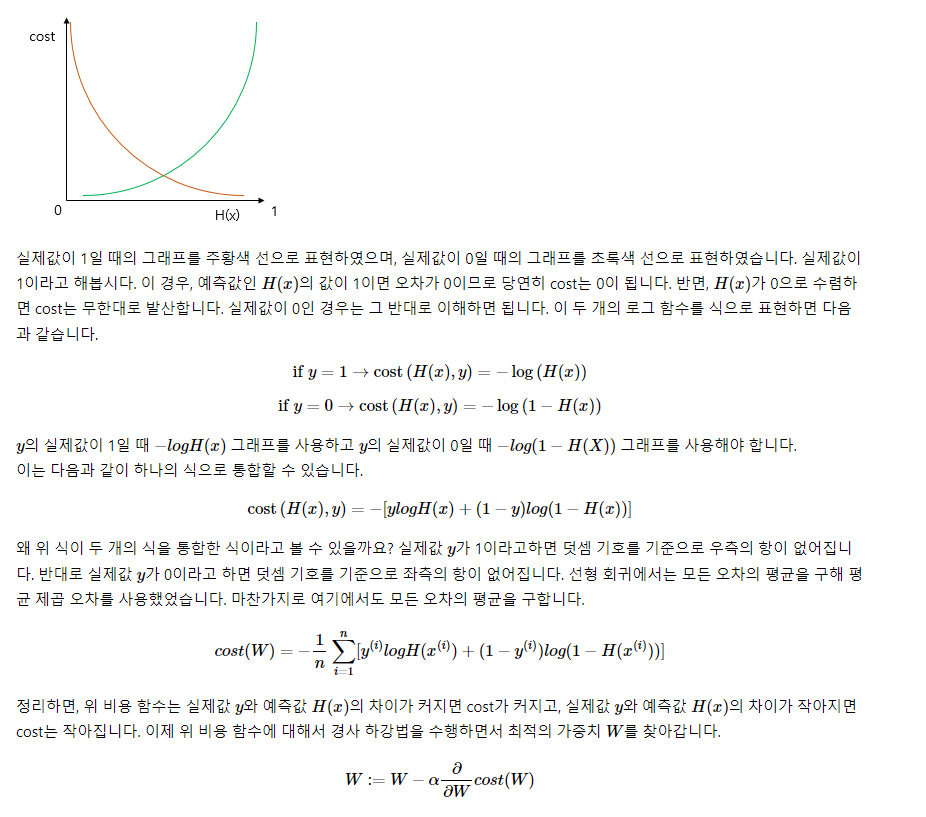

## 파이토치로 로지스틱 회귀 구현~

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [8]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [9]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


(6,2) ⋅ (M, N ) = (6,1)<br>
M = 2 , N = 1 

In [11]:
# Parameter 초기화
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [14]:
# sigmoid
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
hypothesis = torch.sigmoid(x_train.matmul(W) + b) # torch에서 구현한 sigmoid

In [19]:
print(hypothesis, y_train )

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>) tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


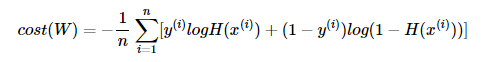

In [24]:
# cost 함수 적용해보자

-( y_train[0] * torch.log(hypothesis[0])  + ( 1- y_train[0] ) * torch.log(1-hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

In [27]:
# 모든 원소에 대해 구해보자
losses = (-y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis))
print(losses)

tensor([[-0.6931],
        [-0.6931],
        [-0.6931],
        [ 0.6931],
        [ 0.6931],
        [ 0.6931]], grad_fn=<AddBackward0>)


In [33]:
cost = losses.mean()
print(cost)

tensor(0., grad_fn=<MeanBackward0>)


In [38]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

In [42]:
# 구현
# 데이터
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2,1) , requires_grad= True)
b = torch.zeros(1, requires_grad= True)

optimizer = optim.SGD([W,b] , lr=1) # lr 1로 하는 이유는?

epochs = 1000
for epoch in range(epochs + 1 ):
  hypothesis = torch.sigmoid(x_train.matmul(W) + b)

  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0 :
    print(f'Cost : {cost:.3f}, epoch : {epoch}')


Cost : 0.693, epoch : 0
Cost : 0.135, epoch : 100
Cost : 0.081, epoch : 200
Cost : 0.058, epoch : 300
Cost : 0.045, epoch : 400
Cost : 0.037, epoch : 500
Cost : 0.032, epoch : 600
Cost : 0.028, epoch : 700
Cost : 0.024, epoch : 800
Cost : 0.022, epoch : 900
Cost : 0.020, epoch : 1000


In [43]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [45]:
prediction = hypothesis >= torch.FloatTensor([0.5])

for i in zip(prediction, y_train):
  print(i)

(tensor([False]), tensor([0.]))
(tensor([False]), tensor([0.]))
(tensor([False]), tensor([0.]))
(tensor([True]), tensor([1.]))
(tensor([True]), tensor([1.]))
(tensor([True]), tensor([1.]))


In [48]:
print(W,b, end='\n')

tensor([[3.2530],
        [1.5179]], requires_grad=True) tensor([-14.4819], requires_grad=True)


### nn.Module로 그대로 구현~

In [49]:
# 전 과정 그대로

model =nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()

)

In [50]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [53]:
# Epoch

optimizer = optim.SGD(model.parameters(), lr=1) 

epochs = 100
for epoch in range(epochs + 1 ):
  hypothesis = model(x_train)

  # cost 
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 20 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 0.5 이상 True
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print(f'Epoch : {epoch:.3f}, Cost : {cost:.3f} , Accuracy : {accuracy:.2%}')
    
                    


Epoch : 0.000, Cost : 0.080 , Accuracy : 100.00%
Epoch : 20.000, Cost : 0.074 , Accuracy : 100.00%
Epoch : 40.000, Cost : 0.069 , Accuracy : 100.00%
Epoch : 60.000, Cost : 0.065 , Accuracy : 100.00%
Epoch : 80.000, Cost : 0.061 , Accuracy : 100.00%
Epoch : 100.000, Cost : 0.057 , Accuracy : 100.00%


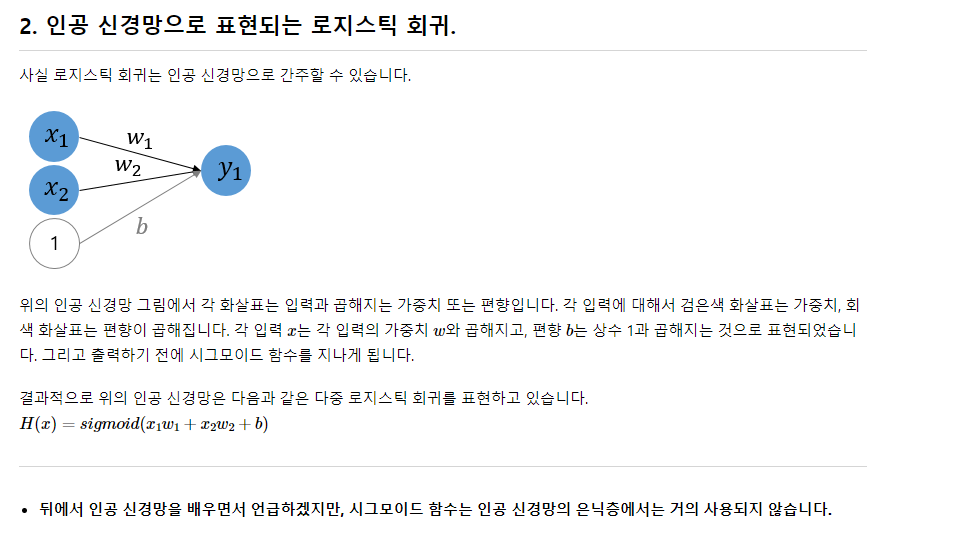

### Class로 구현하기 (대부분 이 방법을 사용한다)
---

In [54]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x ):
    return self.sigmoid(self.linear(x))
    

In [55]:
# 그대론데 모델을
model = BinaryClassifier()

In [56]:
# Epoch

optimizer = optim.SGD(model.parameters(), lr=1) 

epochs = 100
for epoch in range(epochs + 1 ):
  hypothesis = model(x_train)

  # cost 
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 20 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 0.5 이상 True
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print(f'Epoch : {epoch:.3f}, Cost : {cost:.3f} , Accuracy : {accuracy:.2%}')
    
                    


Epoch : 0.000, Cost : 0.615 , Accuracy : 66.67%
Epoch : 20.000, Cost : 0.633 , Accuracy : 83.33%
Epoch : 40.000, Cost : 0.450 , Accuracy : 83.33%
Epoch : 60.000, Cost : 0.287 , Accuracy : 83.33%
Epoch : 80.000, Cost : 0.173 , Accuracy : 100.00%
Epoch : 100.000, Cost : 0.140 , Accuracy : 100.00%
